## Independent study: Initial trial 
### Solving for x(t) = sin($\omega$t) - February 2020

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## 1. Analytical Solution

In [2]:
# let's define the problem
x0 = 0
v0 = 1
omega = 2

The equation we wish to solve is the following:

$$\frac{d^2 x}{d t^2} + \omega^2x = 0$$

With initial conditions $x(0) = x_0$ and $\frac{d x}{d t}(0) = v_0$

The analytical solution is equal to:

$$x(t) = \frac{v_0}{\omega}\sin(\omega t) + x_0$$

Text(0.5, 1.0, 'Analytical solution of ODE')

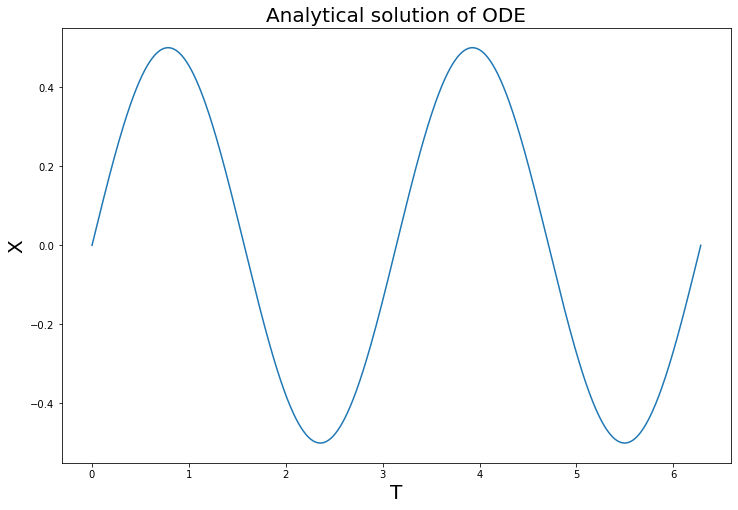

In [3]:
# let's plot the analytical solution
t_analyt = np.linspace(0,2*np.pi, 1000)
x_analyt = [v0/omega*np.sin(omega*i) + x0 for i in t_analyt]

plt.figure(figsize = (12,8))
plt.plot(t_analyt, x_analyt)
plt.xlabel('T', fontsize = 20)
plt.ylabel('X', fontsize = 20)
plt.title('Analytical solution of ODE', fontsize = 20)

## 2. Build the Neural Network

In [5]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1,20, 1

# Create random Tensors to hold inputs and outputs
t = torch.linspace(0, 2*np.pi, N).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): Tanh()
  (4): Linear(in_features=20, out_features=1, bias=True)
)>

In [6]:
mse = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for i in range(3000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    x_hat = x0 + (1 - torch.exp(-t))*v0 + ((1 - torch.exp(-t))**2)*x_NN

    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    if i%50 == 0:
        print(loss)

tensor(14926.3535, grad_fn=<SumBackward0>)
tensor(228.9281, grad_fn=<SumBackward0>)
tensor(157.2329, grad_fn=<SumBackward0>)
tensor(132.9409, grad_fn=<SumBackward0>)
tensor(117.2482, grad_fn=<SumBackward0>)
tensor(103.0894, grad_fn=<SumBackward0>)
tensor(91.5205, grad_fn=<SumBackward0>)
tensor(82.3280, grad_fn=<SumBackward0>)
tensor(75.3112, grad_fn=<SumBackward0>)
tensor(70.2788, grad_fn=<SumBackward0>)
tensor(66.0212, grad_fn=<SumBackward0>)
tensor(62.4384, grad_fn=<SumBackward0>)
tensor(59.7149, grad_fn=<SumBackward0>)
tensor(57.7972, grad_fn=<SumBackward0>)
tensor(56.3021, grad_fn=<SumBackward0>)
tensor(55.1045, grad_fn=<SumBackward0>)
tensor(54.2021, grad_fn=<SumBackward0>)
tensor(53.4927, grad_fn=<SumBackward0>)
tensor(52.8070, grad_fn=<SumBackward0>)
tensor(51.4482, grad_fn=<SumBackward0>)
tensor(49.6789, grad_fn=<SumBackward0>)
tensor(47.5079, grad_fn=<SumBackward0>)
tensor(44.9283, grad_fn=<SumBackward0>)
tensor(42.4026, grad_fn=<SumBackward0>)
tensor(37.4913, grad_fn=<SumBack

In [7]:
test = torch.autograd.Variable(torch.tensor([2.]))
pred = model(test)[0]
pred.item()

-1.6616746187210083

In [8]:
# let's test it 

predictions_2kepoch = []

for t_test in np.linspace(0, 2*np.pi, 50):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_2kepoch.append(pred_hat)
    
predictions_wo_master = []

for t_test in np.linspace(0, 8*np.pi, 100):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_wo_master.append(pred_hat)

In [506]:
# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1,20, 1

# Create random Tensors to hold inputs and outputs
t = torch.linspace(0, 2*np.pi, N).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

mse = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for i in range(1000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    x_hat = x0 + (1 - torch.exp(-t))*v0 + ((1 - torch.exp(-t))**2)*x_NN

    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    if i%50 == 0:
        print(loss)

tensor(5429.6250, grad_fn=<SumBackward0>)
tensor(144.4114, grad_fn=<SumBackward0>)
tensor(87.6087, grad_fn=<SumBackward0>)
tensor(76.4755, grad_fn=<SumBackward0>)
tensor(64.1862, grad_fn=<SumBackward0>)
tensor(60.0041, grad_fn=<SumBackward0>)
tensor(58.4110, grad_fn=<SumBackward0>)
tensor(57.2656, grad_fn=<SumBackward0>)
tensor(56.3604, grad_fn=<SumBackward0>)
tensor(55.5952, grad_fn=<SumBackward0>)
tensor(54.8568, grad_fn=<SumBackward0>)
tensor(53.9289, grad_fn=<SumBackward0>)
tensor(52.9765, grad_fn=<SumBackward0>)
tensor(47.6353, grad_fn=<SumBackward0>)
tensor(46.0565, grad_fn=<SumBackward0>)
tensor(29.1736, grad_fn=<SumBackward0>)
tensor(13.4198, grad_fn=<SumBackward0>)
tensor(10.2680, grad_fn=<SumBackward0>)
tensor(7.5099, grad_fn=<SumBackward0>)
tensor(4.5273, grad_fn=<SumBackward0>)


In [507]:
# let's test it 

predictions_1kepoch = []

for t_test in np.linspace(0, 2*np.pi, 50):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_1kepoch.append(pred_hat)

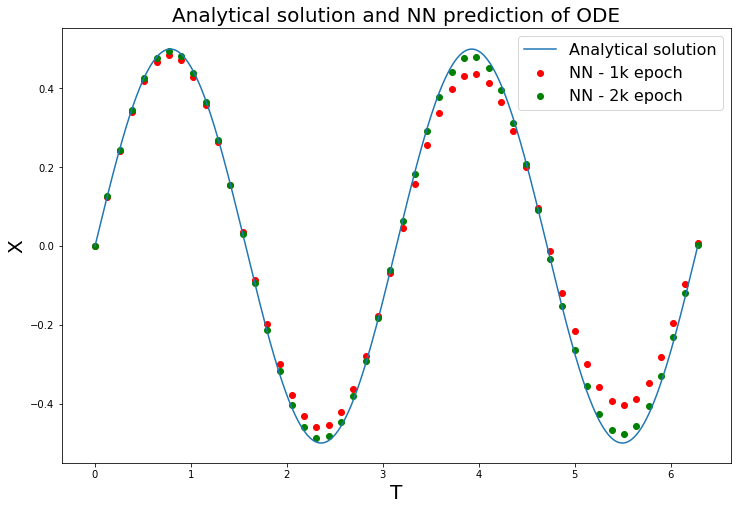

In [508]:
plt.figure(figsize = (12,8))
plt.plot(t_analyt, x_analyt, label = 'Analytical solution')
plt.scatter(np.linspace(0, 2*np.pi, 50), predictions_1kepoch, label = 'NN - 1k epoch', c = 'red')
plt.scatter(np.linspace(0, 2*np.pi, 50), predictions_2kepoch, label = 'NN - 2k epoch', c = 'green')
plt.xlabel('T', fontsize = 20)
plt.ylabel('X', fontsize = 20)
plt.title('Analytical solution and NN prediction of ODE', fontsize = 20)
plt.legend(fontsize = 16)

### Let's try Chebyshev vs linspace

In [34]:
# Do linear with limited amount of epochs and only 50 input points
N, D_in, H, D_out = 100, 1,20, 1

# Create random Tensors to hold inputs and outputs
t = torch.linspace(0, 2*np.pi, N).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

model.parameters

mse = torch.nn.MSELoss(reduction='sum')
losses_lin = []

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for i in range(10000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    x_hat = x0 + (1 - torch.exp(-t))*v0 + ((1 - torch.exp(-t))**2)*x_NN

    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    losses_lin.append(loss.item())
    
print(loss)    

# let's test it 

predictions_lin = []

for t_test in np.linspace(0, 2*np.pi, 50):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_lin.append(pred_hat)

tensor(6.6666, grad_fn=<SumBackward0>)


In [32]:
# Do linear with limited amount of epochs and only 50 input points
N, D_in, H, D_out = 100, 1,20, 1

# Create random Tensors to hold inputs and outputs
t_list = []
a = 0
b = 2*np.pi
for k in range(1, N+1):
    t_list.append((a+b)/2 + 1/2*(b-a)*np.cos((2*k-1)*np.pi/(2*N)))
t = torch.tensor(t_list).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)

model.parameters
losses_cheb = []
mse = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for i in range(10000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    x_hat = x0 + (1 - torch.exp(-t))*v0 + ((1 - torch.exp(-t))**2)*x_NN

    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    losses_cheb.append(loss.item())
print(loss)
    
# let's test it 

predictions_cheb = []

for t_test in np.linspace(0, 2*np.pi, 50):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_cheb.append(pred_hat)

tensor(5.2729, grad_fn=<SumBackward0>)


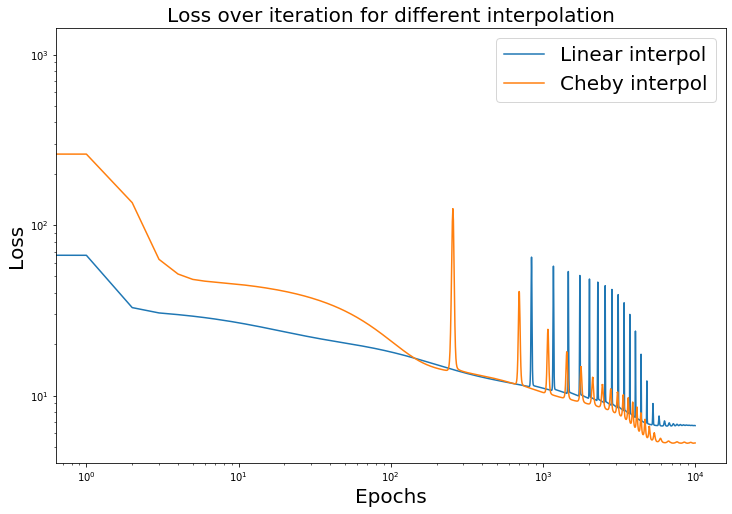

In [35]:
plt.figure(figsize = (12,8))
plt.loglog(range(10000), losses_lin, label = 'Linear interpol')
plt.loglog(range(10000), losses_cheb, label = 'Cheby interpol')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss', fontsize = 20)
plt.title('Loss over iteration for different interpolation', fontsize = 20)
plt.legend(fontsize = 20)

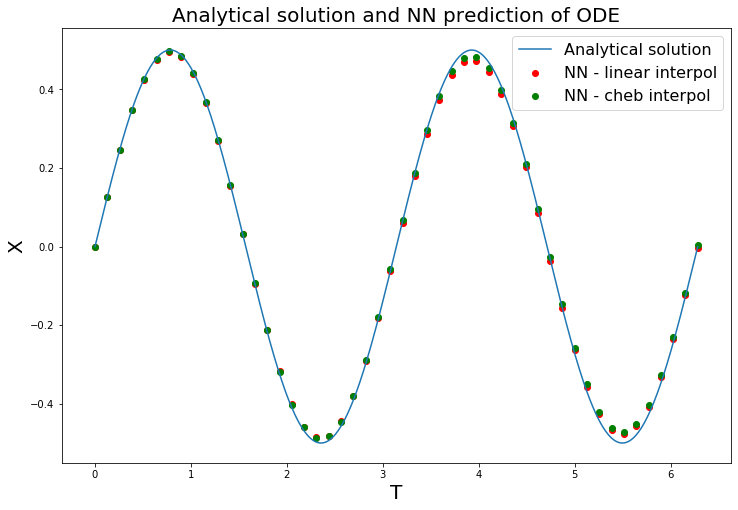

In [512]:
plt.figure(figsize = (12,8))
plt.plot(t_analyt, x_analyt, label = 'Analytical solution')
plt.scatter(np.linspace(0, 2*np.pi, 50), predictions_lin, label = 'NN - linear interpol', c = 'red')
plt.scatter(np.linspace(0, 2*np.pi, 50), predictions_cheb, label = 'NN - cheb interpol', c = 'green')
plt.xlabel('T', fontsize = 20)
plt.ylabel('X', fontsize = 20)
plt.title('Analytical solution and NN prediction of ODE', fontsize = 20)
plt.legend(fontsize = 16)

## Let's try Pavlos Master Node

In [35]:
# let's try with sine activation function

class MyActivationFunction(torch.nn.Module):
    
    def forward(self, x):
        return torch.sin(x)

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1,20, 1

# Create random Tensors to hold inputs and outputs
t = torch.linspace(0, 2*np.pi, N).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_in),
    MyActivationFunction(),
    torch.nn.Linear(D_in, H),
    MyActivationFunction(),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, D_out),
)

mse = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for i in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    x_hat = x0 + (1 - torch.exp(-t))*v0 + ((1 - torch.exp(-t))**2)*x_NN

    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    if i % 50 == 0:
        print(loss)
print(loss)

tensor(6603.2568, grad_fn=<SumBackward0>)
tensor(263.5083, grad_fn=<SumBackward0>)
tensor(246.4559, grad_fn=<SumBackward0>)
tensor(245.5654, grad_fn=<SumBackward0>)
tensor(245.4515, grad_fn=<SumBackward0>)
tensor(245.3782, grad_fn=<SumBackward0>)
tensor(245.2784, grad_fn=<SumBackward0>)
tensor(245.1359, grad_fn=<SumBackward0>)
tensor(244.9225, grad_fn=<SumBackward0>)
tensor(244.5802, grad_fn=<SumBackward0>)
tensor(243.9721, grad_fn=<SumBackward0>)
tensor(242.7056, grad_fn=<SumBackward0>)
tensor(239.2366, grad_fn=<SumBackward0>)
tensor(222.7594, grad_fn=<SumBackward0>)
tensor(122.1544, grad_fn=<SumBackward0>)
tensor(98.4789, grad_fn=<SumBackward0>)
tensor(91.2228, grad_fn=<SumBackward0>)
tensor(58.7237, grad_fn=<SumBackward0>)
tensor(45.4581, grad_fn=<SumBackward0>)
tensor(44.2252, grad_fn=<SumBackward0>)
tensor(42.9210, grad_fn=<SumBackward0>)
tensor(41.5090, grad_fn=<SumBackward0>)
tensor(39.9669, grad_fn=<SumBackward0>)
tensor(38.2773, grad_fn=<SumBackward0>)
tensor(36.4279, grad_fn=

In [36]:
predictions_master = []

for t_test in np.linspace(0, 8*np.pi, 100):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + (1 - np.exp(-t_test))*v0 + ((1 - np.exp(-t_test))**2)*pred_NN
    predictions_master.append(pred_hat)

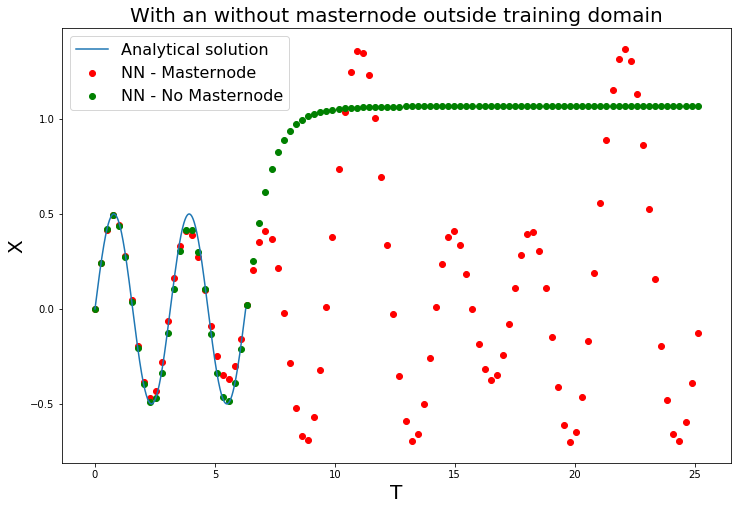

In [37]:
plt.figure(figsize = (12,8))
plt.plot(t_analyt, x_analyt, label = 'Analytical solution')
plt.scatter(np.linspace(0, 8*np.pi, 100), predictions_master, label = 'NN - Masternode', c = 'red')
plt.scatter(np.linspace(0, 8*np.pi, 100), predictions_wo_master, label = 'NN - No Masternode', c = 'green')
plt.xlabel('T', fontsize = 20)
plt.ylabel('X', fontsize = 20)
plt.title('With an without masternode outside training domain', fontsize = 20)
plt.legend(fontsize = 16)

### Let's try different BC operations: didn't work

In [78]:
# let's try with sine activation function

class MyActivationFunction(torch.nn.Module):
    
    def forward(self, x):
        return torch.sin(x)

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000, 1,20, 1

# Create random Tensors to hold inputs and outputs
t = torch.linspace(0, 2*np.pi, N).reshape([N,1])
t.requires_grad_(True)
x = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, D_in),
    MyActivationFunction(),
    torch.nn.Linear(D_in, H),
    MyActivationFunction(),
    torch.nn.Linear(H, H),
    torch.nn.Linear(H, D_out),
)

mse = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for i in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    x_NN = model(t)
    
    ps = [p for p in model.parameters()]
    freq = ps[0]
    bias = ps[1]

    x_hat = x0 + torch.sin(freq*t)*v0/freq + (torch.sin(freq*t)**2)*x_NN
    
    # Compute the first and second derivatives
    x_hat_sum = x_hat.sum()
    
    x_hat_d = torch.autograd.grad(x_hat_sum, t, create_graph=True)[0]
    
    sum_x_hat_d = x_hat_d.sum()
    
    x_hat_dd = torch.autograd.grad(sum_x_hat_d, t, create_graph=True)[0]
    
    loss = mse(x_hat_dd, -(omega**2)*x_hat)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    if i % 50 == 0:
        print(loss)
print(loss)

tensor(4321.9326, grad_fn=<SumBackward0>)
tensor(968.6826, grad_fn=<SumBackward0>)
tensor(11.6909, grad_fn=<SumBackward0>)
tensor(5.6787, grad_fn=<SumBackward0>)
tensor(4.5000, grad_fn=<SumBackward0>)
tensor(3.7060, grad_fn=<SumBackward0>)
tensor(3.0897, grad_fn=<SumBackward0>)
tensor(2.6043, grad_fn=<SumBackward0>)
tensor(2.2179, grad_fn=<SumBackward0>)
tensor(2.0328, grad_fn=<SumBackward0>)
tensor(1.6756, grad_fn=<SumBackward0>)
tensor(1.4664, grad_fn=<SumBackward0>)
tensor(5.1342, grad_fn=<SumBackward0>)
tensor(1.1944, grad_fn=<SumBackward0>)
tensor(1.0530, grad_fn=<SumBackward0>)
tensor(0.9494, grad_fn=<SumBackward0>)
tensor(3.0360, grad_fn=<SumBackward0>)
tensor(0.8192, grad_fn=<SumBackward0>)
tensor(0.7399, grad_fn=<SumBackward0>)
tensor(0.6802, grad_fn=<SumBackward0>)
tensor(0.6848, grad_fn=<SumBackward0>)
tensor(0.7305, grad_fn=<SumBackward0>)
tensor(0.5661, grad_fn=<SumBackward0>)
tensor(0.5274, grad_fn=<SumBackward0>)
tensor(0.4931, grad_fn=<SumBackward0>)
tensor(0.4617, grad

In [79]:
weights = [p.data for p in model.parameters()]
omega_0 = weights[0].item()

In [80]:
predictions_master_adv = []

for t_test in np.linspace(0, 8*np.pi, 100):
    value = torch.autograd.Variable(torch.tensor([t_test]))
    pred_NN = model(value).item()
    pred_hat = x0 + np.sin(omega_0*t_test)*v0/omega_0 + (np.sin(omega_0*t_test)**2)*pred_NN
    predictions_master_adv.append(pred_hat)

In [81]:
omega_0

-0.6659523248672485

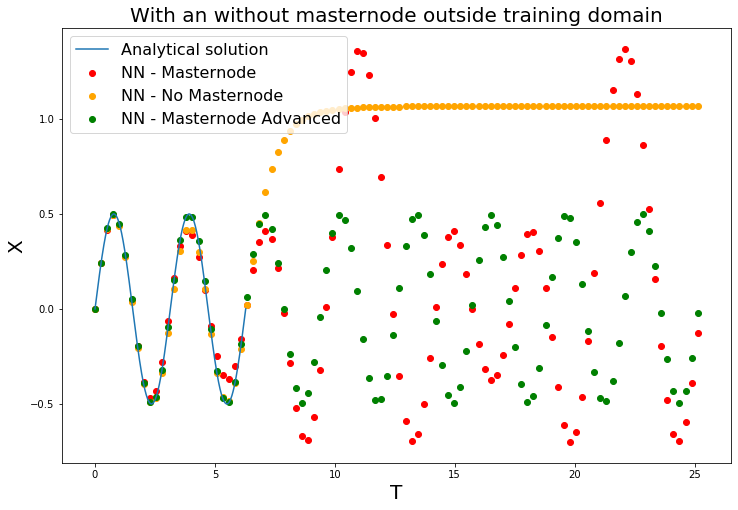

In [82]:
plt.figure(figsize = (12,8))
plt.plot(t_analyt, x_analyt, label = 'Analytical solution')
plt.scatter(np.linspace(0, 8*np.pi, 100), predictions_master, label = 'NN - Masternode', c = 'red')
plt.scatter(np.linspace(0, 8*np.pi, 100), predictions_wo_master, label = 'NN - No Masternode', c = 'orange')
plt.scatter(np.linspace(0, 8*np.pi, 100), predictions_master_adv, label = 'NN - Masternode Advanced', c = 'green')
plt.xlabel('T', fontsize = 20)
plt.ylabel('X', fontsize = 20)
plt.title('With an without masternode outside training domain', fontsize = 20)
plt.legend(fontsize = 16)

In [34]:
2/(np.pi)

0.6366197723675814